In [2]:
#!pip install gensim

#Gensim

Gensim is an open-source library for unsupervised topic modeling, document indexing, retrieval by similarity, and other natural language processing functionalities

The core concepts of gensim are:

- **Document**
In Gensim, a document is an object of the text sequence type (commonly known as str in Python 3). A document could be anything from a short 140 character tweet, a single paragraph (i.e., journal article abstract), a news article, or a book.

- **Corpus**
A corpus is a collection of Document objects. Corpora serve two roles in Gensim:

  1. Input for training a Model. During training, the models use this training corpus to look for common themes and topics, initializing their internal model parameters.

  2. Gensim focuses on unsupervised models so that no human intervention, such as costly annotations or tagging documents by hand, is required.

  3. Documents to organize. After training, a topic model can be used to extract topics from new documents (documents not seen in the training corpus).

  Such corpora can be indexed for Similarity Queries, queried by semantic similarity, clustered etc.

In [3]:
# Here is an Example of text corpus :
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# Lets first preprocess this

cleaned_corpus = [
    doc.lower().split() for doc in text_corpus  # Lowercase it and then tokenizewords also (split())
]

# We can even remove the for stop words if we want
stopwords = set( "for in and not of a the to".split())

print(stopwords)

cleaned_corpus = [
    [word for word in doc if word not in stopwords] for doc in cleaned_corpus
]

cleaned_corpus

{'and', 'to', 'in', 'not', 'the', 'a', 'of', 'for'}


[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

- Before proceeding, we want to associate each word in the corpus with a unique integer ID. We can do this using the gensim.corpora.Dictionary class. This dictionary defines the vocabulary of all words that our processing knows about.

In [4]:
from gensim import corpora

dictionary = corpora.Dictionary(cleaned_corpus)
print(dictionary)

Dictionary<35 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...>


- **Vectorization**



In [5]:
# We can apply simple vectorizations as we seen before using gensim also.
# For ex :
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
# print(new_vec)

# Now lets apply it to entire corpus
bow_corpus = [dictionary.doc2bow(text) for text in cleaned_corpus]
print(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(4, 1), (10, 1), (12, 1), (13, 1), (14, 1)], [(3, 1), (10, 2), (13, 1), (15, 1), (16, 1)], [(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(24, 1), (26, 1), (27, 1), (28, 1)], [(24, 1), (26, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(9, 1), (26, 1), (30, 1)]]


- **Model**

  Now that we have vectorized our corpus we can begin to transform it using models. We use model as an abstract term referring to a transformation from one document representation to another.
  
  In gensim documents are represented as vectors so a model can be thought of as a transformation between two vector spaces. The model learns the details of this transformation during training, when it reads the training Corpus.

  Here’s a simple example. Let’s initialize the tf-idf model, training it on our corpus and transforming the string “system minors”:

In [6]:
from gensim.models import TfidfModel

tfidf = TfidfModel(bow_corpus)
print(tfidf)

words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)]) # The tfidf model returns a list of tuples, where the first entry is the token ID and the second entry is the tf-idf weighting.

TfidfModel<num_docs=9, num_nnz=51>
[(10, 0.5898341626740045), (30, 0.8075244024440723)]


Once you’ve created the model, you can do all sorts of cool stuff with it.

For ex: to transform the whole corpus via TfIdf and index it, in preparation for similarity queries

In [7]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus],num_features = 35)

# Now query a new document on corpus for similar docs
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

[(0, 0.0), (1, 0.12172779), (2, 0.14323246), (3, 0.67615116), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0)]


Correct. Since our 3rd document contained these words systems and engineering.

# Word2Vec in GenSim

Gensim implements the word2vec family of algorithms, using highly optimized C routines, data streaming and Pythonic interfaces.

The word2vec algorithms include skip-gram and CBOW models. There are more ways to train word vectors in Gensim than just Word2Vec. See also Doc2Vec, FastText.

**Embedding techniques** involve creating Q & A type features created for each word in vocabulary. Each of these features are given values based on semantic meanings and human understanding.

For ex : Here is a table

$$
\begin{array}{cccccc}
\text{Features \ Words} & \text{King} & \text{Queen} & \text{Man} & \text{Woman} & \text{Monkeymale} \\
\hline
\text{Gender} & \text{1}    & \text{0}     & \text{1}   & \text{0}     & \text{1}            \\
\text{Wealth}                          & \text{1}    & \text{0.7}   & \text{0.3} & \text{0.3}   & \text{0}            \\
\text{Weight}                          & \text{0.8}  & \text{0.4}   & \text{0.6} & \text{0.5}   & \text{0.3}          \\
\text{Speak}                           & \text{1}    & \text{1}     & \text{1}   & \text{1}     & \text{0}
\end{array}
$$

  - So. A king is represented by vector [1,1,0.8,1] and Queen by [0,0.7,0.4,1] and so on.

  - But manually creating such features, and then converting into vectors by humans is not scalable due to large vocabulary size.

  - Hence We automatically create this, by using machine learning.

Word2Vec uses shallow(not deep) neural networks to learn this processing of creating features and vectors. But note that, such features will be abstract, and we cant explain their significance, meaning.

# Working of Word2Vec
**Continous Bag of Words(CBoW)**

  - We start by defining a dummy problem of predicting target word from its surrounding context( in Continous BoW)

  - This problem helps capture contextual and semantic meaning of the word.

  - In this process, vectors are generated automatically, the size of these vectors is to be determined by us beforehand. The higher vector size we select, more semantic meaning is capturable but more compute intesive.

In [8]:
# Lets take a corpus
corpus = "watch campusx for data science"

corpus_cleaned = corpus.lower().split()
corpus_cleaned

['watch', 'campusx', 'for', 'data', 'science']

  - Now we will consider a Window of 3 words.
  - ie, for the window "watch campusx for" , campusx is target word. watch & for are context words.
  - For odd sized windows, center word is target and surrounding text are context words.

  - lets say we want vectors of size 5 ( this is independent of window size).

Hence based on this here is training data table for our case.

Based on the corpus and a window size of 3, here is the training data table:

$$
\begin{array}{cc}
\text{Context Words} & \text{Target Word} \\
\hline
\text{watch, for} & \text{campusx} \\
\text{campusx, data} & \text{for} \\
\text{for, science} & \text{data}
\end{array}
$$

In each training sample, a one-hot encoding for each word is generated. The size of this one-hot encoded vector is equal to the size of the vocabulary. This is independent of the chosen output vector size (the size of the word embeddings).

- watch => [ 0, ..., 1, ..., 0 ] (where 1 is at the index corresponding to 'watch' in the vocabulary)
- for => [ 0, ..., 1, ..., 0 ] (where 1 is at the index corresponding to 'for' in the vocabulary)
- campusx => [ 0, ..., 1, ..., 0 ] (where 1 is at the index corresponding to 'campusx' in the vocabulary)

These OHE vectors of context words are sent as input to the CBOW neural network.

The input layer hence has 10(5 *2) neurons. ie, (OHE vector size * nof context words in window)

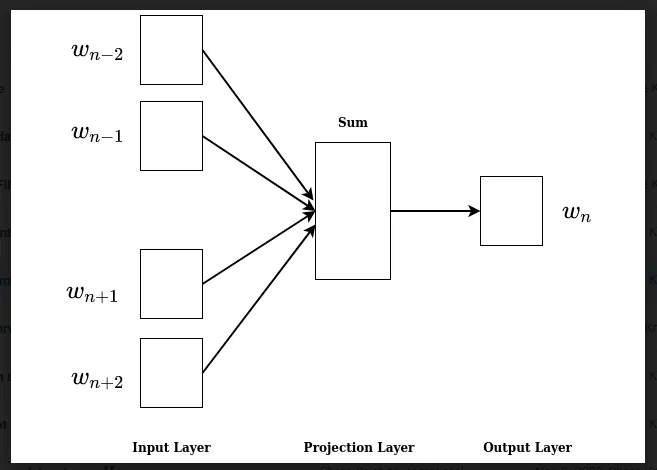

Let's clarify how the desired output vector size (the word embedding) is obtained.

The Continuous Bag-of-Words (CBOW) model typically has a simple neural network architecture with an input layer, a hidden layer, and an output layer.

1.  **Input Layer:** Receives the one-hot encoded vectors for the context words.
2.  **Hidden Layer:** This is where the magic happens! The input vectors are multiplied by a weight matrix connecting the input layer to the hidden layer. This weight matrix has dimensions (vocabulary size) x (embedding size). The number of neurons in the hidden layer *is* the chosen embedding size. The activation of these hidden neurons represents the learned word embedding for the context.
3.  **Output Layer:** This layer has a number of neurons equal to the vocabulary size. The activation from the hidden layer is multiplied by another weight matrix (embedding size) x (vocabulary size) connecting the hidden layer to the output layer. A softmax function is applied to the output layer to produce a probability distribution over the vocabulary, representing the model's prediction for the target word.

The weight matrix between the input layer and the hidden layer (or sometimes the hidden layer and the output layer, depending on the specific implementation) is what contains the learned word embeddings. Each row in this weight matrix corresponds to a word in the vocabulary, and the row itself is the learned embedding vector of the size you specified.

So, while the output layer has a size equal to the vocabulary, the word embeddings themselves are the weights learned in the connection between the input and hidden layers, where the hidden layer's size is set to your desired embedding dimension.

Hence what we need from this problem is actually the weights of hidden layer which act as embedding vectors values. After training, correct embedding vector is thus obtained.

# Implementation

In [9]:
# Sample corpus with multiple sentences
corpus = [
            "watch campusx for ",
            "for data science",
            "science watch campusx"
          ]


cleaned_multi_sentence_corpus = [ [word for word in sentence.lower().split() ] for sentence in corpus ]


print("Original multi-sentence corpus:")
print(corpus)
print("\nCleaned multi-sentence corpus:")
print(cleaned_multi_sentence_corpus)

Original multi-sentence corpus:
['watch campusx for ', 'for data science', 'science watch campusx']

Cleaned multi-sentence corpus:
[['watch', 'campusx', 'for'], ['for', 'data', 'science'], ['science', 'watch', 'campusx']]


**Word2Vec parameters:**

  - sentences: This is the most important parameter. It takes the training corpus. As we discussed, it should be an iterable of iterables, where each inner iterable is a list of words representing a document or sentence. In the cell, cleaned_multi_sentence_corpus is passed here.

  - vector_size: This parameter determines the dimensionality of the word vectors (the embeddings). You set this to 5 in the code, meaning each word will be represented by a vector of 5 numbers. A higher vector_size can capture more semantic nuances but requires more data and computation.(default 100)

  - window: This is the maximum distance between the current word and the predicted word within a sentence. In your code, it's set to 3, meaning the model will consider words up to 3 positions away from the target word as context.(default 5)

  - min_count: This parameter ignores all words with a total frequency lower than this value. Setting min_count=1 means that even words that appear only once in the corpus will be included in the vocabulary and get a word vector. Increasing this value can help filter out rare words and potentially improve the quality of the embeddings for more frequent words.(default=5)

  - workers: This parameter specifies the number of worker threads to use for training. Setting it to 2 means that the training process will use 2 CPU cores in parallel, which can speed up training on multi-core machines.

  - epochs (default = 5)


In [10]:
from gensim.models import Word2Vec

# min_count is 5(can be issue for small corpus). So make sure you always specify correct value to it.
model = Word2Vec(sentences = cleaned_multi_sentence_corpus, vector_size = 5, window= 3, min_count=1, workers = 2, epochs = 20)

print(model)

Word2Vec<vocab=5, vector_size=5, alpha=0.025>


In [11]:
model.wv["campusx"]

array([ 0.1476101 , -0.03066943, -0.09073226,  0.13108103, -0.09720321],
      dtype=float32)

# Training

This process adjusts the word vectors based on the context words in your corpus, allowing the model to learn the semantic and syntactic relationships between words.

After initializing the Word2Vec model with Word2Vec(...), you get a model object that has the .wv attribute, allowing you to access word vectors (like model.wv["campusx"]).

Whether the model is already trained at this point depends on how you initialized it:

  1. If you passed sentences directly in the constructor
  Gensim automatically calls both build_vocab() and train() internally. That means the model is already trained (for the number of epochs you specified, default is 5). You don’t need to call .train() again unless you want to continue training on new data or with more epochs.
  
  2. If you did not pass sentences in the constructor
  The initialization step only sets up the model’s architecture and random weights (including untrained word vectors). In this case, you must explicitly call build_vocab(corpus) and then train(corpus, total_examples=..., epochs=...) to actually train the embeddings.

  In that case, we need to use model.train() method, where the learning happens. During .train(), the model iterates through your corpus and updates the weights of the neural network using an optimization algorithm (like stochastic gradient descent). This process adjusts the word vectors based on context words, allowing the model to learn semantic and syntactic relationships between words.


**model.train() Parameters**

  - corpus: This is the corpus you want to train the model on. It should be in the same format as the sentences parameter you passed during initialization – an iterable of iterables, where each inner iterable is a list of words. You pass your cleaned_multi_sentence_corpus here again.

  - total_examples: This is the total number of documents or sentences in your training corpus. It's required by the training process to calculate the progress and adjust the learning rate. You can get this by getting the length of your corpus (e.g., len(cleaned_multi_sentence_corpus)).

  - epochs: This specifies the number of iterations (epochs) over the corpus during training. A higher number of epochs means the model will see the data more times, potentially leading to better embeddings, but also taking longer to train. A common starting point is 5-20 epochs, but this can vary depending on the dataset size and complexity.

In [12]:
# model.build_vocab(cleaned_corpus)
# model.train(
#     corpus = cleaned_multi_sentence_corpus,
#     total_examples= len(cleaned_multi_sentence_corpus),
#     epochs = 20
#     )                        # Incase we didnt pass corpus to Constructor.

The trained word vectors are stored in a KeyedVectors instance, as model.wv:

For ex :

model.wv['computer']  # To get numpy vector of a word

model.wv.most_similar('computer', topn=4)

In [13]:
model.wv["data"]

array([0.14623155, 0.10141388, 0.13516407, 0.01524903, 0.12701203],
      dtype=float32)

# Fine Tuning or Retraining.

We can provide new training examples to update the model and finetune it. If it involves words out of current vocabulary we need to build new vocabulary first.
Otherwise directly use model.train on new corpus.

In [14]:
corpus2 = [
            "watch campusx where ",
            "for data science",
            "science where campusx",
            "watch where data"
          ]


cleaned_multi_sentence_corpus2 = [ [word for word in sentence.lower().split() ] for sentence in corpus ]

In [15]:
model.build_vocab(cleaned_multi_sentence_corpus2, update=True) # update needs to set true manually to update the vocabulary with new words from new corpus
model.train(cleaned_multi_sentence_corpus2, total_examples=len(cleaned_multi_sentence_corpus2), epochs=20)


(15, 180)

In [16]:
model.wv["data"]

array([0.14623155, 0.10141388, 0.13516407, 0.01524903, 0.12701203],
      dtype=float32)

# Skin-Gram



## Skip-gram

In contrast to CBOW which predicts the target word from its context words, the Skip-gram model does the opposite. It predicts the context words from a given target word.

- **Target Word:** The single word in the center of the window.
- **Context Words:** The words surrounding the target word within the defined window size.

Think of the neural network architecture as reversed compared to CBOW.

![1710832109082.png](<binary data omitted>)

The input layer takes the one-hot encoded vector of the target word. The hidden layer remains the same size as the desired embedding vector. The output layer, however, is typically a softmax layer that predicts the probability distribution of the context words within the window.

Unlike CBOW,  where the word embeddings are learned and stored in the weight matrix connecting the hidden layer to the output layer,
In SkipGram, embeddings are weights from input layer to the hidden layer. This matrix contains the vector representations for each word in the vocabulary.

### CBOW vs Skip-gram: When to use which?

- **CBOW (Continuous Bag-of-Words):**
    - **Speed:** Generally faster to train than Skip-gram.
    - **Performance:** Performs better with frequent words.
    - **Use Cases:** Suitable for larger datasets where speed is a concern and you are less interested in the embeddings of rare words.

- **Skip-gram:**
    - **Speed:** Slower to train than CBOW.
    - **Performance:** Performs better with infrequent words and is good at capturing semantic relationships, especially with rare words.
    - **Use Cases:** Preferred for smaller datasets or when you need high-quality embeddings for both frequent and infrequent words, and capturing analogies (like "king - man + woman = queen") is important.

In Gensim, you can choose between CBOW and Skip-gram using the `sg` parameter in the `Word2Vec` constructor:

- `sg=0`: Uses the CBOW model (this is the default).
- `sg=1`: Uses the Skip-gram model.

In [17]:
from gensim.models import Word2Vec

# Example of using Skip-gram
skipgram_model = Word2Vec(sentences = cleaned_multi_sentence_corpus, vector_size = 5, window= 3, min_count=1, workers = 2, epochs = 20, sg=1) # sg=1 for Skip-gram

print(skipgram_model)
print(skipgram_model.wv["campusx"])

Word2Vec<vocab=5, vector_size=5, alpha=0.025>
[ 0.1476101  -0.03066943 -0.09073226  0.13108103 -0.09720321]
